[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/pixeltable/pixeltable/blob/release/docs/notebooks/integrations/working-with-openai.ipynb)&nbsp;&nbsp;
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pixeltable/pixeltable/blob/release/docs/notebooks/integrations/working-with-openai.ipynb)&nbsp;&nbsp;
<a href="https://raw.githubusercontent.com/pixeltable/pixeltable/release/docs/notebooks/integrations/working-with-openai.ipynb" download><img src="https://img.shields.io/badge/%E2%AC%87-Download%20Notebook-blue" alt="Download Notebook"></a>

# Working with OpenAI in Pixeltable

Pixeltable's OpenAI integration enables you to access OpenAI models via the OpenAI API.

### Prerequisites
- An OpenAI account with an API key (https://openai.com/index/openai-api/)

### Important Notes

- OpenAI usage may incur costs based on your OpenAI plan.
- Be mindful of sensitive data and consider security measures when integrating with external services.

First you'll need to install required libraries and enter your OpenAI API key.

In [ ]:
%pip install -qU pixeltable openai

In [ ]:
import os
import getpass
if 'OPENAI_API_KEY' not in os.environ:
    os.environ['OPENAI_API_KEY'] = getpass.getpass('Enter your OpenAI API key:')

Now let's create a Pixeltable directory to hold the tables for our demo.

In [1]:
import pixeltable as pxt

# Remove the 'openai_demo' directory and its contents, if it exists
pxt.drop_dir('openai_demo', force=True)
pxt.create_dir('openai_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/asiegel/.pixeltable/pgdata
Created directory 'openai_demo'.


## Chat Completions

Create a Table: In Pixeltable, create a table with columns to represent your input data and the columns where you want to store the results from OpenAI.

In [2]:
from pixeltable.functions import openai

# Create a table in Pixeltable and add a computed column that calls OpenAI

t = pxt.create_table('openai_demo.chat', {'input': pxt.String})

messages = [{'role': 'user', 'content': t.input}]
t.add_computed_column(output=openai.chat_completions(
    messages=messages,
    model='gpt-4o-mini',
    options={
        # Optional dict with parameters for the OpenAI API
        'max_tokens': 300,
        'top_p': 0.9,
        'temperature': 0.7
    }
))

Created table `chat`.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [3]:
# Parse the response into a new column
t.add_computed_column(response=t.output.choices[0].message.content)

Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [4]:
# Start a conversation
t.insert(input="How many islands are in the Aleutian island chain?")
t.select(t.input, t.response).head()

Inserting rows into `chat`: 1 rows [00:00, 98.97 rows/s]
Inserted 1 row with 0 errors.


input,response
How many islands are in the Aleutian island chain?,"The Aleutian Islands consist of over 300 islands, stretching from the Alaska Peninsula to the Kamchatka Peninsula in Russia. The exact number can vary depending on how one defines an island, but the main islands and the larger ones are often the focus of discussion, which number around 80. The chain is known for its volcanic activity and unique ecosystems."


## Embeddings

In [5]:
emb_t = pxt.create_table('openai_demo.embeddings', {'input': pxt.String})
emb_t.add_computed_column(embedding=openai.embeddings(
    input=emb_t.input,
    model='text-embedding-3-small'
))

Created table `embeddings`.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [6]:
emb_t.insert(input='OpenAI provides a variety of embeddings models.')

Inserting rows into `embeddings`: 1 rows [00:00, 108.08 rows/s]
Inserted 1 row with 0 errors.


UpdateStatus(num_rows=1, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

In [7]:
emb_t.head()

input,embedding
OpenAI provides a variety of embeddings models.,[-0.023 -0.045 0.069 -0.017 -0.008 -0.027 ... 0.009 0.005 0.021 0.018 -0.012 -0.008]


## Image Generations

In [8]:
image_t = pxt.create_table('openai_demo.images', {'input': pxt.String})
image_t.add_computed_column(img=openai.image_generations(
    image_t.input,
    model='dall-e-2',
))

Created table `images`.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [9]:
image_t.insert([
    {'input': 'A giant Pixel floating in the open ocean in a sea of data'}
])

Inserting rows into `images`: 1 rows [00:00, 392.50 rows/s]
Inserted 1 row with 0 errors.


UpdateStatus(num_rows=1, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

In [10]:
image_t

Table 'openai_demo.images'

 Column Name                 Type                               Computed With
       input               String                                            
         img  Image[(1024, 1024)]  image_generations(input, model='dall-e-2')

input,img
A giant Pixel floating in the open ocean in a sea of data,

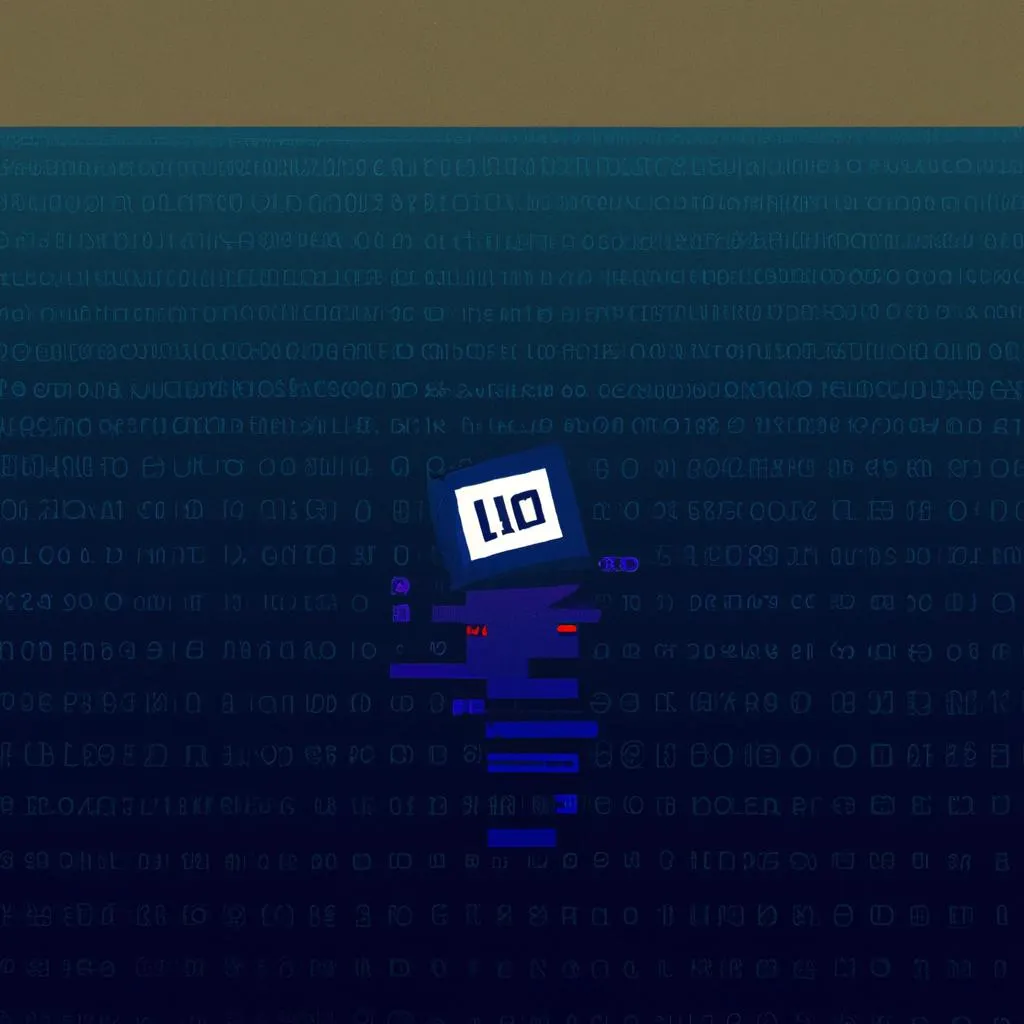

In [11]:
image_t.head()

### Learn More

To learn more about advanced techniques like RAG operations in Pixeltable, check out the [RAG Operations in Pixeltable](https://pixeltable.readme.io/docs/rag-operations-in-pixeltable) tutorial.

If you have any questions, don't hesitate to reach out.